# **Step 3 --- Feature Engineering**

In [25]:
import talib as ta
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\LuxDev DSA\Capstone-Project\Crypto-BuySell-Model\notebooks\data\processed\BTCUSDT_1d.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           1000 non-null   object 
 1   open                1000 non-null   float64
 2   high                1000 non-null   float64
 3   low                 1000 non-null   float64
 4   close               1000 non-null   float64
 5   volume              1000 non-null   float64
 6   close_time          1000 non-null   object 
 7   quote_asset_volume  1000 non-null   float64
 8   num_trades          1000 non-null   float64
 9   taker_base_volume   1000 non-null   float64
 10  taker_quote_volume  1000 non-null   float64
dtypes: float64(9), object(2)
memory usage: 86.1+ KB


,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,taker_quote_volume
0,2023-03-03,23465.32,23476.95,21971.13,22354.34,319954.19785,2023-03-03 23:59:59.999,7.167185e+09,8214639.0,156827.31366,3.512245e+09
1,2023-03-04,22354.34,22410.00,22157.08,22346.57,121257.38132,2023-03-04 23:59:59.999,2.706423e+09,4169260.0,60043.33153,1.340205e+09
2,2023-03-05,22346.57,22662.09,22189.22,22430.24,154841.75786,2023-03-05 23:59:59.999,3.473011e+09,4835978.0,77394.35765,1.735989e+09
3,2023-03-06,22430.24,22602.19,22258.00,22410.00,203751.82957,2023-03-06 23:59:59.999,4.569102e+09,6471278.0,102110.26304,2.289889e+09
4,2023-03-07,22409.41,22557.91,21927.00,22197.96,292519.80912,2023-03-07 23:59:59.999,6.517595e+09,7813394.0,145498.64219,3.242137e+09


In [11]:
df = df.drop("1_day_return",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           1000 non-null   object 
 1   open                1000 non-null   float64
 2   high                1000 non-null   float64
 3   low                 1000 non-null   float64
 4   close               1000 non-null   float64
 5   volume              1000 non-null   float64
 6   close_time          1000 non-null   object 
 7   quote_asset_volume  1000 non-null   float64
 8   num_trades          1000 non-null   float64
 9   taker_base_volume   1000 non-null   float64
 10  taker_quote_volume  1000 non-null   float64
 11  rsi                 987 non-null    float64
 12  sma_20              981 non-null    float64
 13  return_1d           999 non-null    float64
 14  return_7d           993 non-null    float64
dtypes: float64(13), object(2)
memory usage: 117.3+ KB


In [ ]:
df['return_1d'] = df['close'].pct_change(1)
df['return_1d']

0           NaN
1     -0.000348
2      0.003744
3     -0.000902
4     -0.009462
         ...   
995   -0.004578
996    0.024667
997    0.016930
998   -0.010533
999    0.005267
Name: return_1d, Length: 1000, dtype: float64

In [9]:
df['return_7d'] = df['close'].pct_change(7)
df['return_7d']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
995   -0.113566
996   -0.078839
997   -0.042456
998   -0.060142
999   -0.040684
Name: return_7d, Length: 1000, dtype: float64

In [17]:
df["rolling_volatility"] = df["close"].pct_change().rolling(7).std()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           1000 non-null   object 
 1   open                1000 non-null   float64
 2   high                1000 non-null   float64
 3   low                 1000 non-null   float64
 4   close               1000 non-null   float64
 5   volume              1000 non-null   float64
 6   close_time          1000 non-null   object 
 7   quote_asset_volume  1000 non-null   float64
 8   num_trades          1000 non-null   float64
 9   taker_base_volume   1000 non-null   float64
 10  taker_quote_volume  1000 non-null   float64
 11  rsi                 987 non-null    float64
 12  sma_20              981 non-null    float64
 13  return_1d           999 non-null    float64
 14  return_7d           993 non-null    float64
 15  rolling_volatility  993 non-null    float64
dtypes: floa

In [19]:
df.tail()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,taker_quote_volume,rsi,sma_20,return_1d,return_7d,rolling_volatility
995,2025-11-22,85129.42,85620.00,83500.00,84739.74,14193.93263,2025-11-22 23:59:59.999,1.197657e+09,4697593.0,6688.79428,5.645621e+08,22.795101,97589.5980,-0.004578,-0.113566,0.019002
996,2025-11-23,84739.75,88127.64,84667.57,86830.00,19734.46418,2025-11-23 23:59:59.999,1.708685e+09,5063493.0,10406.51703,9.012105e+08,28.608261,96601.9460,0.024667,-0.078839,0.024744
997,2025-11-24,86830.00,89228.00,85272.00,88300.01,24663.12795,2025-11-24 23:59:59.999,2.150394e+09,6189156.0,12438.87518,1.085485e+09,32.459800,95942.0855,0.016930,-0.042456,0.026320
998,2025-11-25,88300.01,88519.99,86116.00,87369.96,19567.04110,2025-11-25 23:59:59.999,1.708989e+09,4838747.0,9423.17985,8.231235e+08,31.308933,95116.3255,-0.010533,-0.060142,0.025605
999,2025-11-26,87369.97,88224.00,86306.77,87830.16,11998.43031,2025-11-26 23:59:59.999,1.047401e+09,2952754.0,5878.35646,5.131996e+08,32.582659,94440.5315,0.005267,-0.040684,0.025889


In [21]:
df["rsi"] = ta.momentum.RSIIndicator(df["close"]).rsi()
df["sma_20"] = df["close"].rolling(20).mean()
df["sma_50"] = df["close"].rolling(50).mean()
df["sma_200"] = df["close"].rolling(200).mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           1000 non-null   object 
 1   open                1000 non-null   float64
 2   high                1000 non-null   float64
 3   low                 1000 non-null   float64
 4   close               1000 non-null   float64
 5   volume              1000 non-null   float64
 6   close_time          1000 non-null   object 
 7   quote_asset_volume  1000 non-null   float64
 8   num_trades          1000 non-null   float64
 9   taker_base_volume   1000 non-null   float64
 10  taker_quote_volume  1000 non-null   float64
 11  rsi                 987 non-null    float64
 12  sma_20              981 non-null    float64
 13  return_1d           999 non-null    float64
 14  return_7d           993 non-null    float64
 15  rolling_volatility  993 non-null    float64
 16  sma_50 

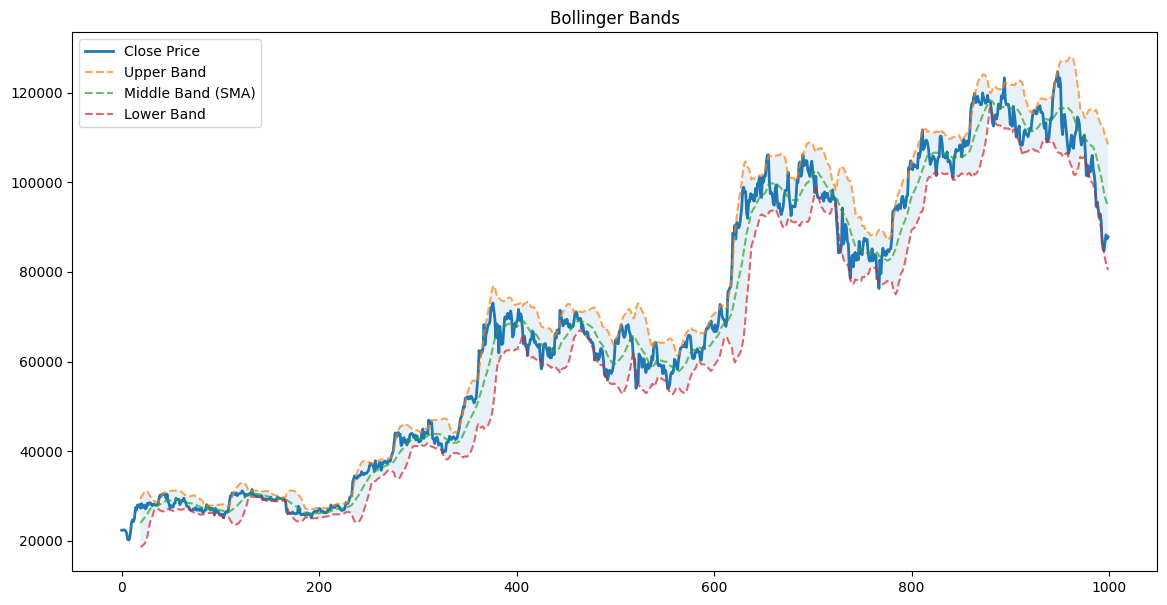

In [26]:
# Calculate Bollinger Bands
upper, middle, lower = ta.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)

df['bb_upper'] = upper
df['bb_middle'] = middle
df['bb_lower'] = lower

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', linewidth=2)
plt.plot(df.index, df['bb_upper'], label='Upper Band', linestyle='--', alpha=0.7)
plt.plot(df.index, df['bb_middle'], label='Middle Band (SMA)', linestyle='--', alpha=0.7)
plt.plot(df.index, df['bb_lower'], label='Lower Band', linestyle='--', alpha=0.7)
plt.fill_between(df.index, df['bb_upper'], df['bb_lower'], alpha=0.1)
plt.title('Bollinger Bands')
plt.legend()
plt.show()

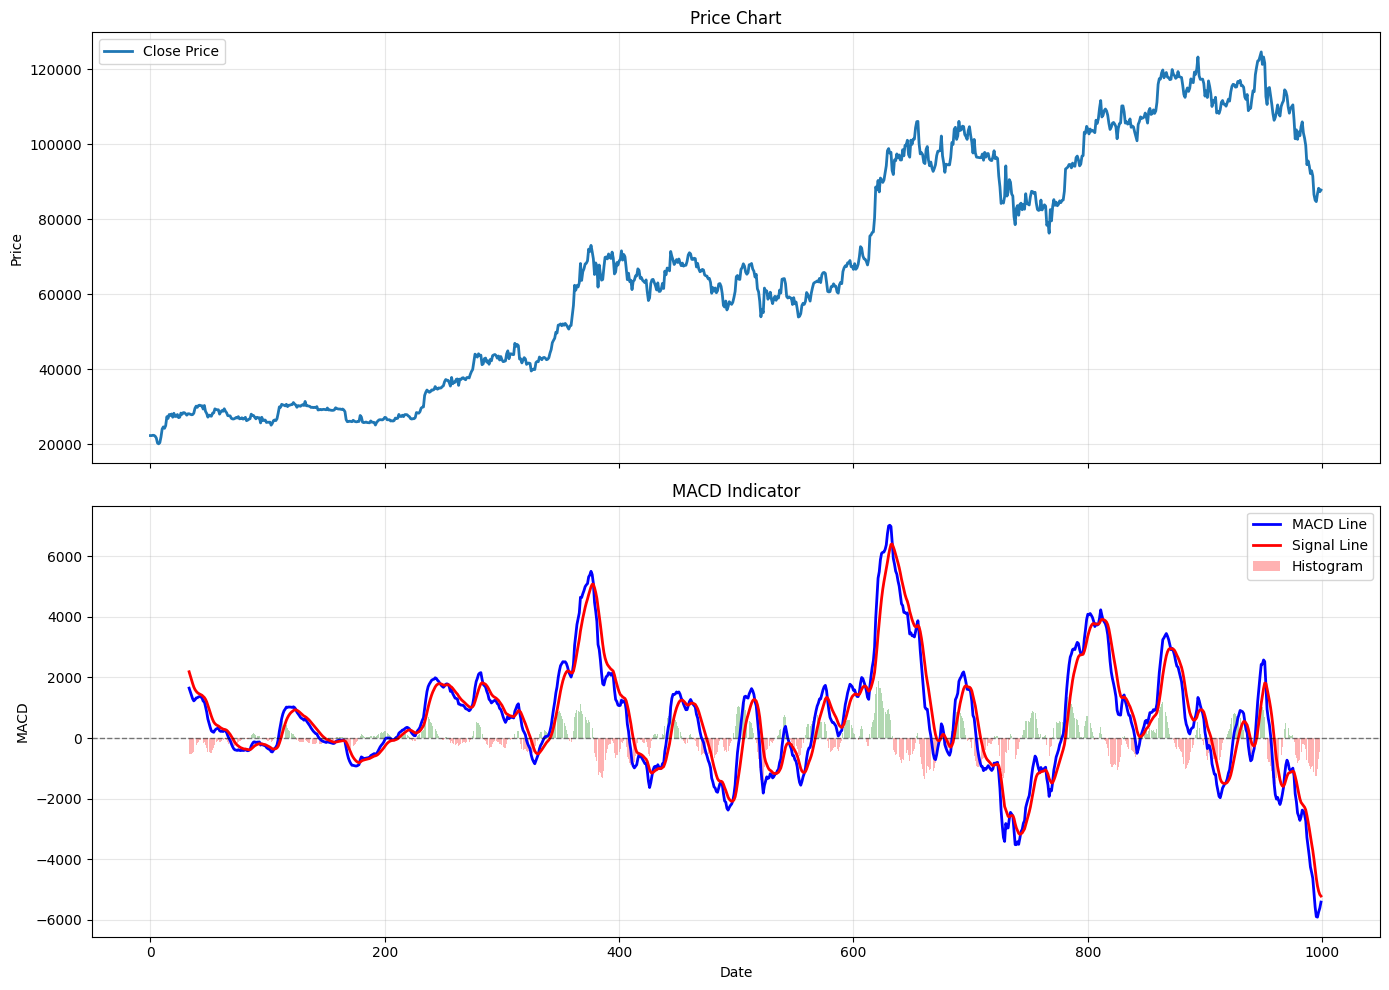

In [28]:
macd, signal, histogram = ta.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)

df['macd'] = macd
df['macd_signal'] = signal
df['macd_histogram'] = histogram

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Price
ax1.plot(df.index, df['close'], label='Close Price', linewidth=2)
ax1.set_ylabel('Price')
ax1.set_title('Price Chart')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: MACD
ax2.plot(df.index, df['macd'], label='MACD Line', linewidth=2, color='blue')
ax2.plot(df.index, df['macd_signal'], label='Signal Line', linewidth=2, color='red')

# Histogram with colors (green = positive, red = negative)
colors = ['green' if val >= 0 else 'red' for val in df['macd_histogram']]
ax2.bar(df.index, df['macd_histogram'], label='Histogram', color=colors, alpha=0.3)

# Add zero line
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)

ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.set_title('MACD Indicator')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
